question 1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


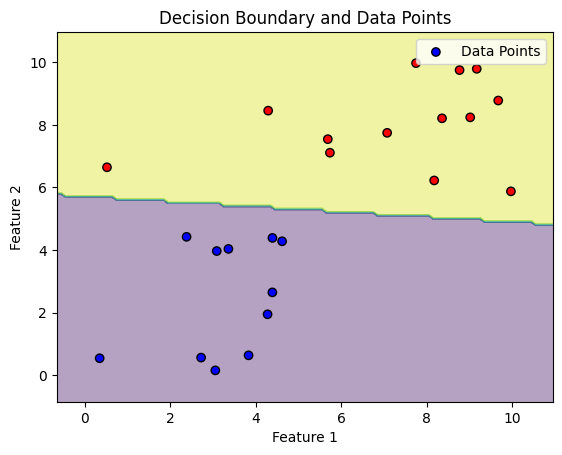

In [5]:
# Date  (16_04_24)
# CSC354 – Assignmen3 – ML – Support Vector Machines
# Aimah Siddique
# FA21-BSE-092
#used Support Vector Machines for  tasks by fitting linear SVMs to datasets, analyzing grouping of positive and negative instances, and handling outliers.
#I also examined the performance of SVMs with polynomial and Gaussian kernels on the Iris dataset and optimizes hyperparameters using grid search.
#also found optimal parameters of a Gaussian kernel SVM using grid search, and used them
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Load the dataset
from google.colab import drive
#drive.mount('/content/drive')
#file_path = 'https://drive.google.com/file/d/18BqZxq-Waxkv2F4zy7T8PNAG4AtP19w9/view?usp=drive_link'
data = pd.read_csv('/content/drive/MyDrive/SP24-ML-BSE/datasets/dataset-q-1.csv')

# Separate features (X) and labels (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Fit a linear SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

# Plot decision boundary and data points
def plot_decision_boundary(X, y, model):
    # Create a meshgrid of feature values
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Plot decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)

    # Plot data points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.bwr, marker='o', edgecolor='k', label='Data Points')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary and Data Points')
    plt.legend()
    plt.show()

# Plot decision boundary and data points
plot_decision_boundary(X, y, svm_model)


question 2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


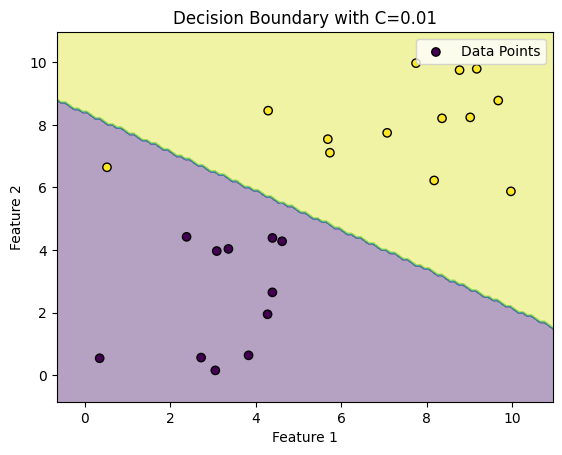

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


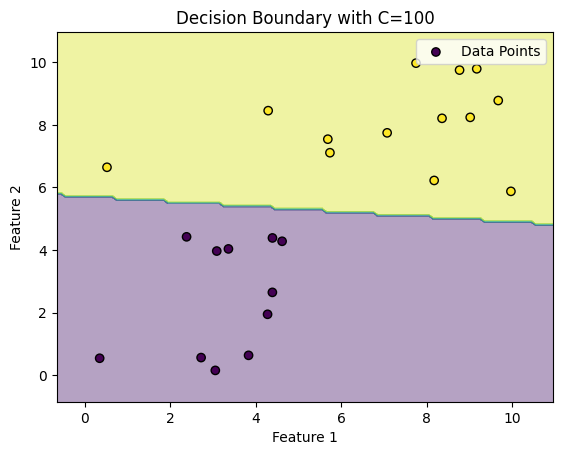

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


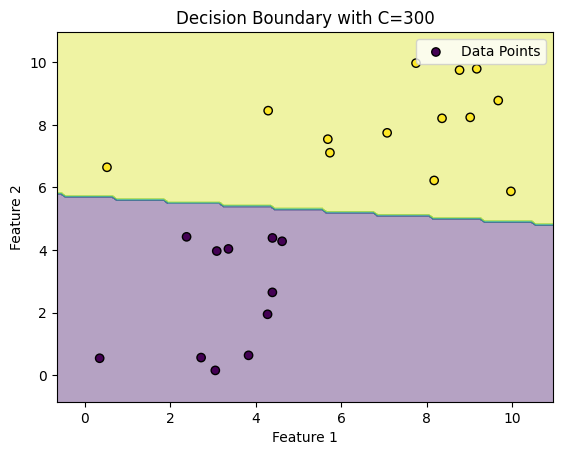

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


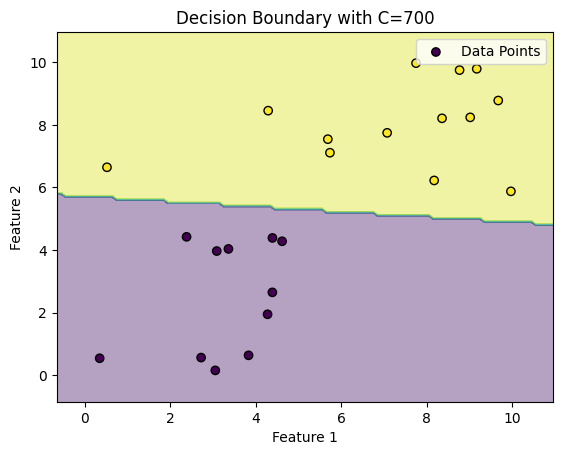

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


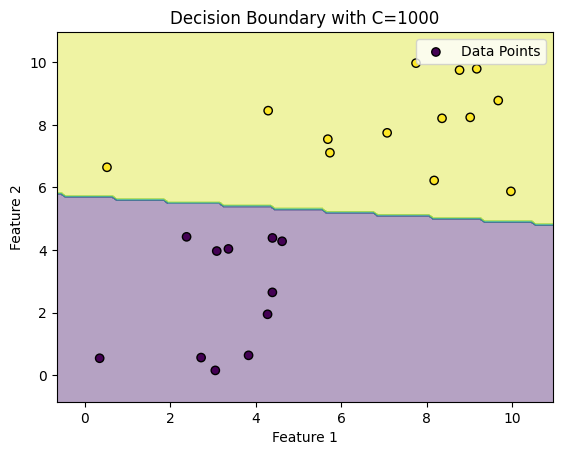

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/SP24-ML-BSE/datasets/dataset-q-1.csv')

# Separate features (X) and labels (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Define values of C to experiment with
C_values = [0.01, 100, 300, 700, 1000]

# Fit SVM models with different values of C and plot the resulting hyperplanes
for C in C_values:
    # Fit a linear SVM model with current value of C
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X, y)

    # Plot decision boundary and data points
    def plot_decision_boundary(X, y, model):
        # Create a meshgrid of feature values
        x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
        y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

        # Plot decision boundary
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)

        # Plot data points
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, marker='o', edgecolor='k', label='Data Points')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(f'Decision Boundary with C={C}')
        plt.legend()
        plt.show()

    # Plot decision boundary for current value of C
    plot_decision_boundary(X, y, svm_model)


question 3


In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use the first two features
y = iris.target

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to fit SVM model with given kernel and parameters, and calculate accuracy
def fit_svm_and_evaluate(kernel, C=None, degree=None, sigma=None):
    if kernel == 'poly':
        model = SVC(kernel='poly', C=C, degree=degree)
    elif kernel == 'rbf':
        model = SVC(kernel='rbf', C=C, gamma=(1 / (2 * (sigma ** 2))))

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Evaluate SVM models with different kernel settings
kernel_settings = [
    {'kernel': 'poly', 'C': 1.0, 'degree': 2},
    {'kernel': 'rbf', 'C': 1.0, 'sigma': 1.0}
]

polynomial_settings = [
    {'kernel': 'poly', 'C': 1.0, 'degree': 2},
    {'kernel': 'poly', 'C': 0.5, 'degree': 2},
    {'kernel': 'poly', 'C': 1.0, 'degree': 3}
]

gaussian_settings = [
    {'kernel': 'rbf', 'C': 1.0, 'sigma': 1.0},
    {'kernel': 'rbf', 'C': 0.5, 'sigma': 1.0},
    {'kernel': 'rbf', 'C': 1.0, 'sigma': 2.0}
]

for settings in kernel_settings:
    kernel = settings['kernel']
    C = settings.get('C')
    degree = settings.get('degree')
    sigma = settings.get('sigma')

    accuracy = fit_svm_and_evaluate(kernel, C, degree, sigma)
    print(f"Kernel: {kernel}, C: {C}, Degree: {degree}, Sigma: {sigma}, Accuracy: {accuracy}")


for setting in polynomial_settings:
    # Fit SVM with current settings
    svm_model = SVC(kernel=setting['kernel'], C=setting['C'], degree=setting['degree'])
    svm_model.fit(X_train, y_train)
    # Predict labels for test data
    y_pred = svm_model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for polynomial kernel with C={setting['C']} and degree={setting['degree']}: {accuracy}")


for setting in gaussian_settings:
    # Fit SVM with current settings
    svm_model = SVC(kernel=setting['kernel'], C=setting['C'], gamma=1 / (2 * setting['sigma'] ** 2))
    svm_model.fit(X_train, y_train)
    # Predict labels for test data
    y_pred = svm_model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for Gaussian kernel with C={setting['C']} and sigma={setting['sigma']}: {accuracy}")


Kernel: poly, C: 1.0, Degree: 2, Sigma: None, Accuracy: 0.8333333333333334
Kernel: rbf, C: 1.0, Degree: None, Sigma: 1.0, Accuracy: 0.9
Accuracy for polynomial kernel with C=1.0 and degree=2: 0.8333333333333334
Accuracy for polynomial kernel with C=0.5 and degree=2: 0.8333333333333334
Accuracy for polynomial kernel with C=1.0 and degree=3: 0.8333333333333334
Accuracy for Gaussian kernel with C=1.0 and sigma=1.0: 0.9
Accuracy for Gaussian kernel with C=0.5 and sigma=1.0: 0.9
Accuracy for Gaussian kernel with C=1.0 and sigma=2.0: 0.9


question 4

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/SP24-ML-BSE/datasets/dataset-q-4.csv")

# Separate features (X) and labels (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}

# Initialize the SVM classifier with Gaussian kernel
svm_model = SVC(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the optimal values of C and sigma
optimal_C = grid_search.best_params_['C']
optimal_sigma = grid_search.best_params_['gamma']

# Fit SVM with the optimal values
optimal_svm_model = SVC(kernel='rbf', C=optimal_C, gamma=optimal_sigma)
optimal_svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred = optimal_svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Optimal values:")
print(f"C: {optimal_C}")
print(f"Sigma: {optimal_sigma}")
print(f"Accuracy: {accuracy}")


Optimal values:
C: 10
Sigma: 0.1
Accuracy: 0.9615384615384616
